<a href="https://colab.research.google.com/github/Kanchan786786/Capstone_project-/blob/main/google_facebook_prophet_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt


# Loading data

In [ ]:
import yfinance as yf
import pandas as pd

# Download flat Apple stock data
data = yf.download("goog", start="2018-01-01", end="2024-12-31")

# Reset index
data = data.reset_index()

# Show columns and types
print("COLUMNS:\n", data.columns)
print("\nDATA TYPES:\n", data.dtypes)


[*********************100%***********************]  1 of 1 completed

COLUMNS:
 MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

DATA TYPES:
 Price   Ticker
Date              datetime64[ns]
Close   GOOG             float64
High    GOOG             float64
Low     GOOG             float64
Open    GOOG             float64
Volume  GOOG               int64
dtype: object


In [ ]:
# Step 2: Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns.values]
data = data.reset_index()


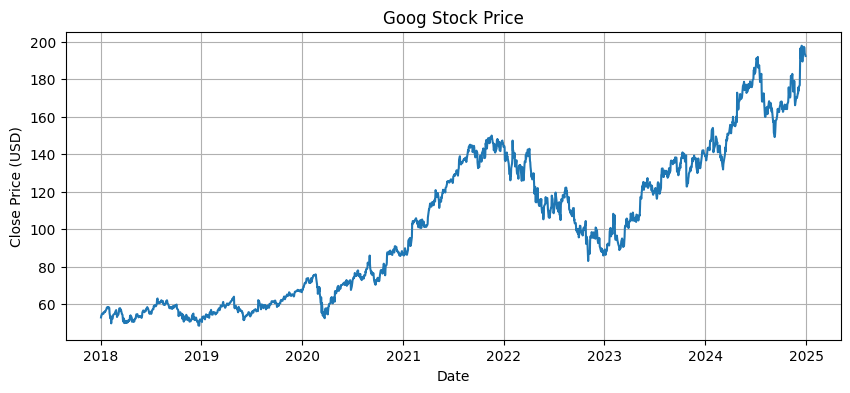

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(data['Date'], data['Close_GOOG']) # Changed to existing column names
plt.title("Goog Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Extract 'Date' and 'Close_AAPL'
df = data[['Date', 'Close_GOOG']].copy()
df.columns = ['ds', 'y']  # Rename for Prophet

In [ ]:
# Step 4: Ensure proper datatypes
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [ ]:
# Display the first and last dates
print("First Date:", df['ds'].min())
print("Last Date:", df['ds'].max())


First Date: 2018-01-02 00:00:00
Last Date: 2024-12-30 00:00:00


In [ ]:
# Step 5: Fit the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/gr5mv9n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/_myqhl6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97529', 'data', 'file=/tmp/tmpzrzulp6_/gr5mv9n_.json', 'init=/tmp/tmpzrzulp6_/_myqhl6e.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model9aeh3a2k/prophet_model-20250411152155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


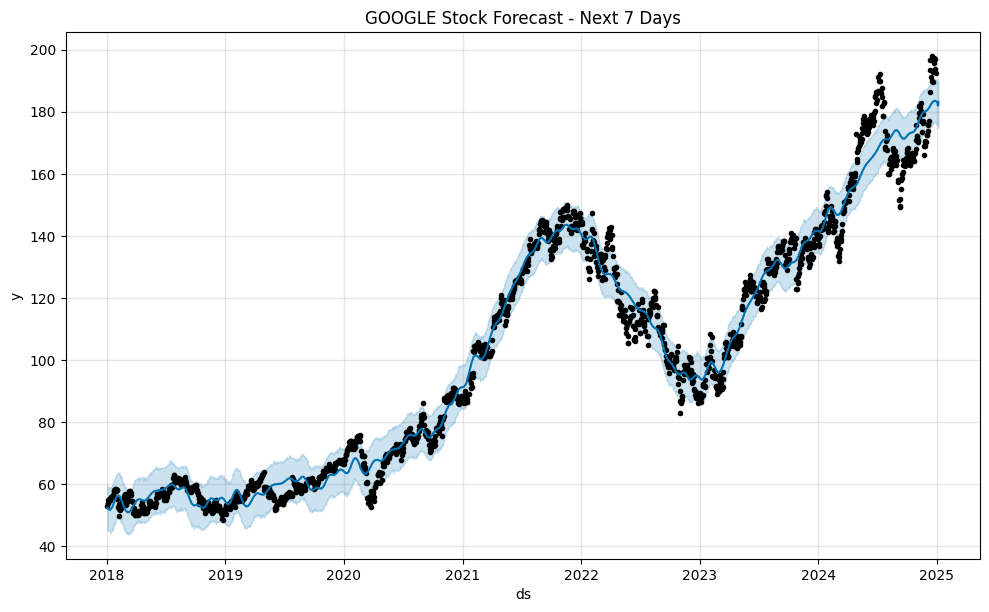

In [ ]:
# Step 6: Forecast next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Step 7: Plot forecast
model.plot(forecast)
plt.title("GOOGLE Stock Forecast - Next 7 Days")
plt.show()

# Adding Seasonality

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/of6je2kd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/lo9vw8o1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82841', 'data', 'file=/tmp/tmpzrzulp6_/of6je2kd.json', 'init=/tmp/tmpzrzulp6_/lo9vw8o1.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelurrxhelp/prophet_model-20250411152209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


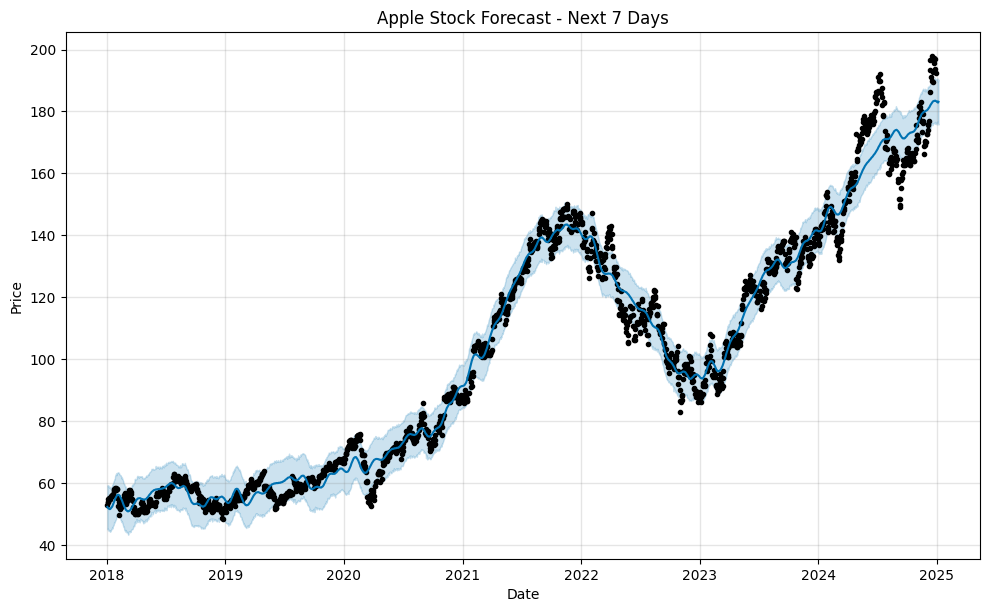

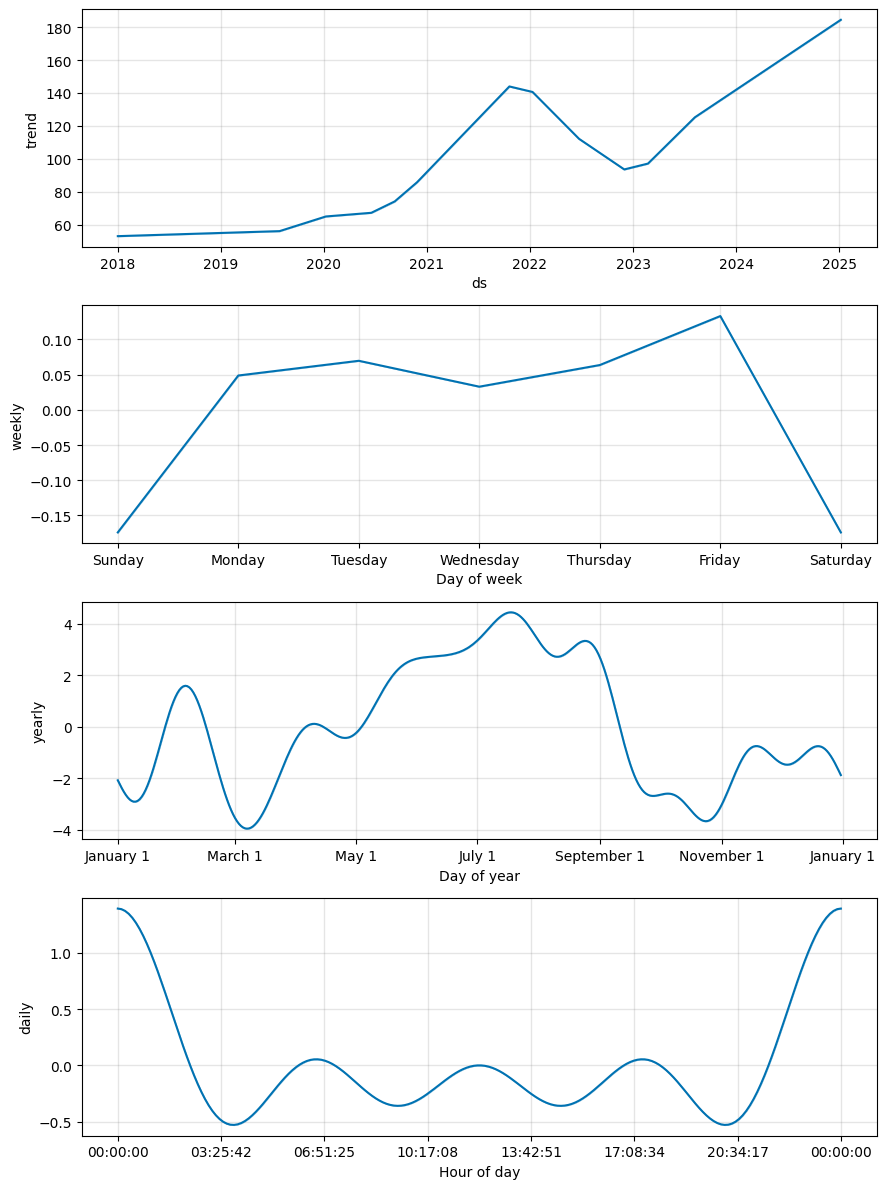

INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ood8i4wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/eb3kllju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94626', 'data', 'file=/tmp/tmpzrzulp6_/ood8i4wi.json', 'init=/tmp/tmpzrzulp6_/eb3kllju.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelbgy8ufpr/prophet_model-20250411152212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/xx28oemi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/u_8uz36e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


📋 Cross-Validation Metrics (7-Day Horizon):
  horizon       mae      mape       rmse
0  1 days  7.606764  0.052802   9.586545
1  2 days  5.273081  0.039802   6.687437
2  3 days  8.050187  0.055416  10.164814
3  4 days  6.018534  0.042056   7.856982
4  5 days  7.688138  0.054709   9.012256


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics


# 🔮 5. Create Prophet Model with Seasonality
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# 🧠 6. Fit the Model
model.fit(df)

# ⏳ 7. Forecast Next 7 Days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# 📊 8. Plot Forecast
model.plot(forecast)
plt.title("Apple Stock Forecast - Next 7 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# 🔍 9. Forecast Components
model.plot_components(forecast)
plt.show()

# 📈 10. Evaluate Model with Cross-Validation
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='7 days')

# 📊 11. Performance Metrics
df_p = performance_metrics(df_cv)
print("\n📋 Cross-Validation Metrics (7-Day Horizon):")
print(df_p[['horizon', 'mae', 'mape', 'rmse']].head())

#Hyperparameter Tuning

**Small Grid**

**Turned off daily seasonality**

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# SMALL grid
cps_values = [0.01, 0.1]
sps_values = [1.0, 10.0]

results = []

for cps in cps_values:
    for sps in sps_values:
        print(f"Trying cps={cps}, sps={sps}")
        model = Prophet(
            changepoint_prior_scale=cps,
            seasonality_prior_scale=sps,
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True
        )
        model.fit(df)

        # Cross-validation
        df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='7 days', parallel="processes")
        df_p = performance_metrics(df_cv)

        results.append({
            'cps': cps,
            'sps': sps,
            'mape': df_p['mape'].mean(),
            'mae': df_p['mae'].mean(),
            'rmse': df_p['rmse'].mean()
        })

# Convert to DataFrame and sort
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mape')
print("\n📋 Small Grid Results (sorted by MAPE):")
print(results_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/b9khhdbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/iiszifyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35832', 'data', 'file=/tmp/tmpzrzulp6_/b9khhdbr.json', 'init=/tmp/tmpzrzulp6_/iiszifyo.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model5qz0s50l/prophet_model-20250411152220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Trying cps=0.01, sps=1.0


15:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b080d50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/gjfnzjw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/1uoak_44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/yt4vzm63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/54gv2kqu.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3950', 'data', 'file=/tmp/tmpzrzulp6_/gjfnzjw5.json', 'init=/tmp/tmpzrzulp6_/yt4vzm63.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelbtlg6t35/prophet_model-202504

Trying cps=0.01, sps=10.0


15:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928693b8310>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/8wikxqns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/pt4xvt8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/7vishkdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26586', 'data', 'file=/tmp/tmpzrzulp6_/8wikxqns.json', 'init=/tmp/tmpzrzulp6_/7vishkdk.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_models4k0dppn/prophet_model-20250411152229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

Trying cps=0.1, sps=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/hyqq8c6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70697', 'data', 'file=/tmp/tmpzrzulp6_/mt26ccy1.json', 'init=/tmp/tmpzrzulp6_/hyqq8c6e.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model3j5h1y3k/prophet_model-20250411152233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869213210>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/j5o4l0sa.json
DEBUG:cmdstanpy:input tempfile: 

Trying cps=0.1, sps=10.0


15:22:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869213cd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/8172_yh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/7bz8mqdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/1v47153c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81987', 'data', 'file=/tmp/tmpzrzulp6_/8172_yh0.json', 'init=/tmp/tmpzrzulp6_/1v47153c.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model6fjypv3b/prophet_model-20250411152246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta


📋 Small Grid Results (sorted by MAPE):
    cps   sps      mape       mae       rmse
3  0.10  10.0  0.036735  5.345374   6.798952
2  0.10   1.0  0.036942  5.372505   6.813270
1  0.01  10.0  0.067392  9.197979  11.786500
0  0.01   1.0  0.067918  9.276939  11.889566


Best parameter of .10 and 10 for cps and sps are choosen

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/sa4rhmxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/eiuvr8j7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5867', 'data', 'file=/tmp/tmpzrzulp6_/sa4rhmxl.json', 'init=/tmp/tmpzrzulp6_/eiuvr8j7.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelchfwjpfg/prophet_model-20250411152357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📈 Forecast for Jan 1–7, 2025:
             ds        yhat  yhat_lower  yhat_upper
1760 2024-12-31  182.099640  175.191639  188.647517
1761 2025-01-01  182.032955  175.173635  188.599212
1762 2025-01-02  182.004384  175.039710  188.852043
1763 2025-01-03  182.033588  175.398152  188.693837
1764 2025-01-04  179.755936  172.835690  186.316342
1765 2025-01-05  179.752535  173.030180  186.239345
1766 2025-01-06  181.939369  175.444439  188.564676


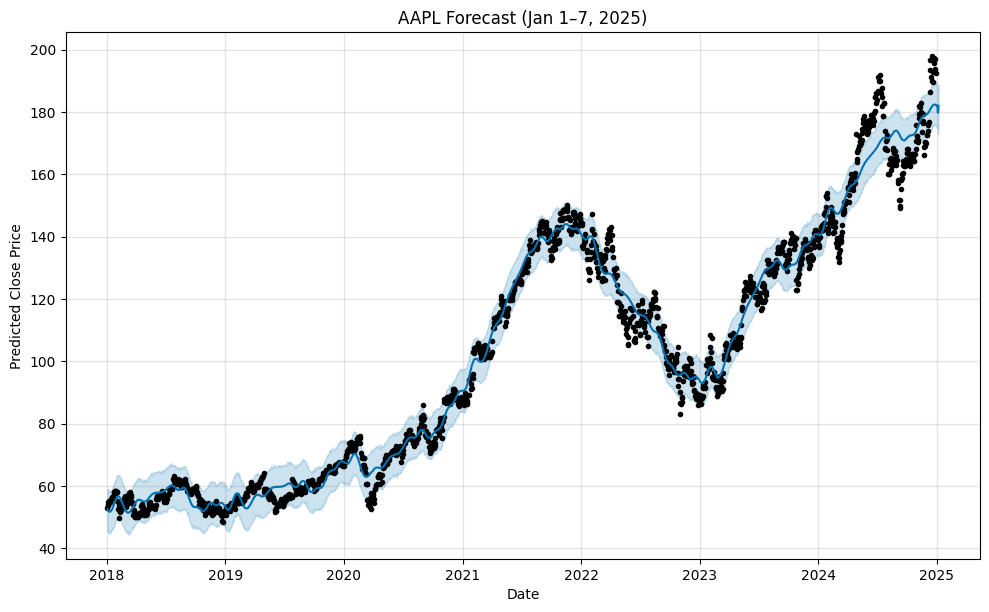

In [ ]:
# Final best model
from prophet import Prophet
import matplotlib.pyplot as plt

final_model = Prophet(
    changepoint_prior_scale=0.10,
    seasonality_prior_scale=10,
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Fit on all available data
final_model.fit(df)

# Create dataframe for next 7 days (Jan 1 to Jan 7, 2025)
future = final_model.make_future_dataframe(periods=7)
forecast = final_model.predict(future)

# Show only the last 7 days
forecast_final = forecast[forecast['ds'] >= '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\n📈 Forecast for Jan 1–7, 2025:")
print(forecast_final)

# Plot
final_model.plot(forecast)
plt.title("AAPL Forecast (Jan 1–7, 2025)")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.show()


In [ ]:
future_all = df[['ds']].copy()  # just dates of the actual data
forecast_all = final_model.predict(future_all)


In [ ]:
df_eval = df.merge(forecast_all[['ds', 'yhat']], on='ds')
df_eval['error'] = df_eval['y'] - df_eval['yhat']
df_eval['abs_error'] = df_eval['error'].abs()
df_eval['pct_error'] = (df_eval['abs_error'] / df_eval['y']) * 100

# Summary metrics
mae = df_eval['abs_error'].mean()
mape = df_eval['pct_error'].mean()
rmse = ((df_eval['error'])**2).mean()**0.5

print(f"📊 In-Sample Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


📊 In-Sample Evaluation:
MAE:  3.92
MAPE: 4.00%
RMSE: 5.23


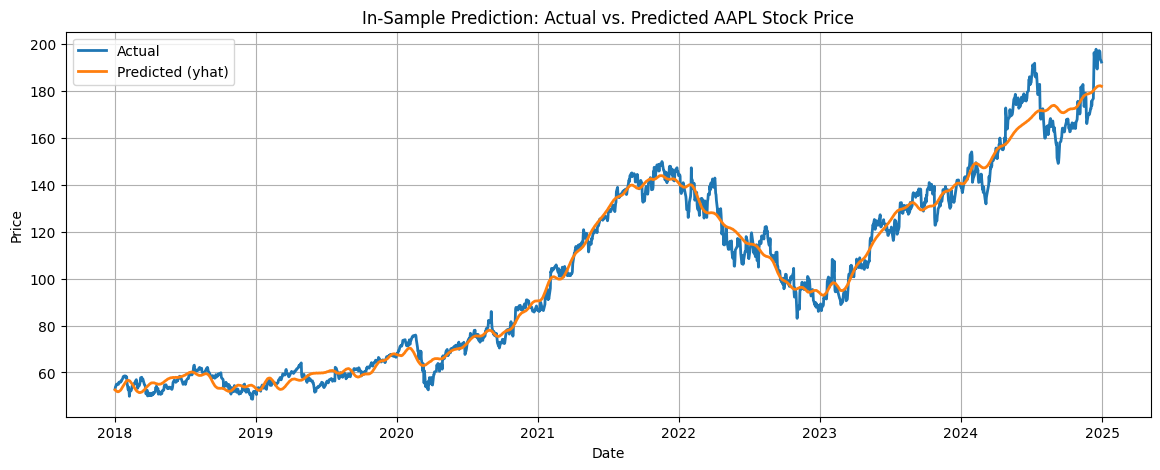

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df_eval['ds'], df_eval['y'], label='Actual', linewidth=2)
plt.plot(df_eval['ds'], df_eval['yhat'], label='Predicted (yhat)', linewidth=2)
plt.title("In-Sample Prediction: Actual vs. Predicted AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


# Full grid search

In [ ]:
  from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet
import pandas as pd

# 🔧 Expanded parameter grid
cps_values = [0.001, 0.01, 0.05, 0.1, 0.5]
sps_values = [0.1, 1.0, 5.0, 10.0]
modes = ['additive', 'multiplicative']

results = []

print("🚀 Starting full grid search...\n")

for cps in cps_values:
    for sps in sps_values:
        for mode in modes:
            print(f"⏳ Trying cps={cps}, sps={sps}, mode={mode}")
            model = Prophet(
                changepoint_prior_scale=cps,
                seasonality_prior_scale=sps,
                seasonality_mode=mode,
                daily_seasonality=False,
                weekly_seasonality=True,
                yearly_seasonality=True
            )
            model.fit(df)

            # Cross-validation
            df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='7 days', parallel="processes")
            df_p = performance_metrics(df_cv)

            results.append({
                'cps': cps,
                'sps': sps,
                'mode': mode,
                'mape': df_p['mape'].mean(),
                'mae': df_p['mae'].mean(),
                'rmse': df_p['rmse'].mean()
            })

# 📊 Show sorted leaderboard
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mape')
print("\n✅ Full Grid Search Results (Sorted by MAPE):")
print(results_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/cac88s3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/hu0qvi3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83753', 'data', 'file=/tmp/tmpzrzulp6_/cac88s3j.json', 'init=/tmp/tmpzrzulp6_/hu0qvi3w.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model5qjstk_n/prophet_model-20250411152416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


🚀 Starting full grid search...

⏳ Trying cps=0.001, sps=0.1, mode=additive


15:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928692f5950>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/z8na2q8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/xw8qnpan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/r2dsokyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48061', 'data', 'file=/tmp/tmpzrzulp6_/z8na2q8q.json', 'init=/tmp/tmpzrzulp6_/r2dsokyi.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelyq29c3_v/prophet_model-20250411152416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.001, sps=0.1, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/23dw15i2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82423', 'data', 'file=/tmp/tmpzrzulp6_/6ij291xi.json', 'init=/tmp/tmpzrzulp6_/23dw15i2.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model7s441aju/prophet_model-20250411152426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286af93350>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/51y4hu8r.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.001, sps=1.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/j129j84j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99495', 'data', 'file=/tmp/tmpzrzulp6_/g35oa_nk.json', 'init=/tmp/tmpzrzulp6_/j129j84j.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modele2ebk0n6/prophet_model-20250411152439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286afd3bd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jf12t4oh.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.001, sps=1.0, mode=multiplicative


15:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b178890>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/nz81sbur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/365k_r74.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/t_qe_mno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ompx7e10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36487', 'data', 'file=/tmp/tmpzrzulp6_/365k_r74.json', 'init=/tmp/tmpzrzulp6_/t_qe_mno.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model9ga1er38/prophet_model-20250411152449.csv', 'method=optimize', 'algorithm=lbfgs

⏳ Trying cps=0.001, sps=5.0, mode=additive


15:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b15cc50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/m87fcore.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/bspkb_cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/n3n6ai0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19734', 'data', 'file=/tmp/tmpzrzulp6_/m87fcore.json', 'init=/tmp/tmpzrzulp6_/n3n6ai0b.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelwdwrmvnh/prophet_model-20250411152454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.001, sps=5.0, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/pveipv_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52484', 'data', 'file=/tmp/tmpzrzulp6_/k9f2urq7.json', 'init=/tmp/tmpzrzulp6_/pveipv_c.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model_vg5oitv/prophet_model-20250411152503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694f3990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/koincik9.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.001, sps=10.0, mode=additive


15:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286946cbd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/d_r8zjky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/vjb1tr58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/s1oasvlm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/cttpflxl.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58086', 'data', 'file=/tmp/tmpzrzulp6_/d_r8zjky.json', 'init=/tmp/tmpzrzulp6_/s1oasvlm.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modeloxf00ctk/prophet_model-20250411152513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

⏳ Trying cps=0.001, sps=10.0, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/1pxaxhny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14292', 'data', 'file=/tmp/tmpzrzulp6_/9h8rpeu3.json', 'init=/tmp/tmpzrzulp6_/1pxaxhny.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modeldojou3xh/prophet_model-20250411152525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b092a90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/9tobtisl.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.01, sps=0.1, mode=additive


15:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b1a7110>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/lasero9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/z4z12zyh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/h9e3ymsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92552', 'data', 'file=/tmp/tmpzrzulp6_/lasero9s.json', 'init=/tmp/tmpzrzulp6_/h9e3ymsr.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model8anla1k5/prophet_model-20250411152533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.01, sps=0.1, mode=multiplicative


15:25:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286948b410>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/dld6byq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/j3u3ubas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jio6xh48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27257', 'data', 'file=/tmp/tmpzrzulp6_/dld6byq5.json', 'init=/tmp/tmpzrzulp6_/jio6xh48.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modele9zvafrz/prophet_model-20250411152538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/z9s514nx.json
15:25

⏳ Trying cps=0.01, sps=1.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/gezmyw67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9854', 'data', 'file=/tmp/tmpzrzulp6_/crf1rexg.json', 'init=/tmp/tmpzrzulp6_/gezmyw67.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model5xavarmq/prophet_model-20250411152546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694d1590>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/mr6nhsxb.json
DEBUG:cmdstanpy:input tempfile: /

⏳ Trying cps=0.01, sps=1.0, mode=multiplicative


15:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694d3990>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/m37xi4uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/i6i9doqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/lncru70r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jauarhev.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68761', 'data', 'file=/tmp/tmpzrzulp6_/m37xi4uu.json', 'init=/tmp/tmpzrzulp6_/lncru70r.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelsaijfcrp/prophet_model-20250411152553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG

⏳ Trying cps=0.01, sps=5.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/__ch55b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79666', 'data', 'file=/tmp/tmpzrzulp6_/xl1sqx0p.json', 'init=/tmp/tmpzrzulp6_/__ch55b5.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelva1cspd6/prophet_model-20250411152600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694647d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/vx8bz2wg.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.01, sps=5.0, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/rdz0cfjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94092', 'data', 'file=/tmp/tmpzrzulp6_/zipdk895.json', 'init=/tmp/tmpzrzulp6_/rdz0cfjn.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model6260nk6w/prophet_model-20250411152608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286afc9550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/6gubtg6h.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.01, sps=10.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/6ygdptgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23027', 'data', 'file=/tmp/tmpzrzulp6_/h8dv605x.json', 'init=/tmp/tmpzrzulp6_/6ygdptgm.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model_tjnydrd/prophet_model-20250411152624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b1b36d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/3_o5c4yd.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.01, sps=10.0, mode=multiplicative


15:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869340290>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/99_phk45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/fj54sq4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/u9pgt_vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94047', 'data', 'file=/tmp/tmpzrzulp6_/99_phk45.json', 'init=/tmp/tmpzrzulp6_/u9pgt_vw.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modeldw6m4xmb/prophet_model-20250411152632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.05, sps=0.1, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/7re9fgfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19352', 'data', 'file=/tmp/tmpzrzulp6_/a4upmofd.json', 'init=/tmp/tmpzrzulp6_/7re9fgfn.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model6w2le4am/prophet_model-20250411152641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b2bd550>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jfal5xmc.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.05, sps=0.1, mode=multiplicative


15:26:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286942ae10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/_zd35aha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/f2roby4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/9yej7bgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92434', 'data', 'file=/tmp/tmpzrzulp6_/_zd35aha.json', 'init=/tmp/tmpzrzulp6_/9yej7bgg.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelh_chux7x/prophet_model-20250411152654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:54 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdst

⏳ Trying cps=0.05, sps=1.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/uog4tvut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78563', 'data', 'file=/tmp/tmpzrzulp6_/w0jek8wz.json', 'init=/tmp/tmpzrzulp6_/uog4tvut.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modell2sjp_0n/prophet_model-20250411152703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b1bb010>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/m9m2p5b9.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.05, sps=1.0, mode=multiplicative


15:27:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286affaed0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/nau4pcgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/hm_1e_0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/fs5hmvue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80830', 'data', 'file=/tmp/tmpzrzulp6_/nau4pcgq.json', 'init=/tmp/tmpzrzulp6_/fs5hmvue.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model2azf4dcv/prophet_model-20250411152714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:14 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdst

⏳ Trying cps=0.05, sps=5.0, mode=additive


15:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869467110>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/278cxcxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/w4nrtbah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/py6wsbjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22227', 'data', 'file=/tmp/tmpzrzulp6_/278cxcxz.json', 'init=/tmp/tmpzrzulp6_/py6wsbjt.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelekh4r3d1/prophet_model-20250411152737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.05, sps=5.0, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/7kgj879b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60350', 'data', 'file=/tmp/tmpzrzulp6_/14h87jl_.json', 'init=/tmp/tmpzrzulp6_/7kgj879b.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model8y5k8b9v/prophet_model-20250411152746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b1a64d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/m62vu56s.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.05, sps=10.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/cykd374k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37774', 'data', 'file=/tmp/tmpzrzulp6_/7xs9hg0n.json', 'init=/tmp/tmpzrzulp6_/cykd374k.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelycxc1fyu/prophet_model-20250411152815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b271f90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/0tr0g0gb.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.05, sps=10.0, mode=multiplicative


15:28:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b092d90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/3uop4k70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ynfy6f6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/snwmou6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35854', 'data', 'file=/tmp/tmpzrzulp6_/3uop4k70.json', 'init=/tmp/tmpzrzulp6_/snwmou6r.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelj62n_5wi/prophet_model-20250411152827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.1, sps=0.1, mode=additive


15:28:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694d26d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/v18xd915.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/_g_4ee_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/0tbsyvms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73340', 'data', 'file=/tmp/tmpzrzulp6_/_g_4ee_p.json', 'init=/tmp/tmpzrzulp6_/0tbsyvms.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelp_ehm7iz/prophet_model-20250411152850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ty1hc219.json
15:28

⏳ Trying cps=0.1, sps=0.1, mode=multiplicative


15:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286948a750>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/vq1plqq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/s45f0pub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/a5b1n8oa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42903', 'data', 'file=/tmp/tmpzrzulp6_/vq1plqq_.json', 'init=/tmp/tmpzrzulp6_/a5b1n8oa.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelf1rgun8l/prophet_model-20250411152901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.1, sps=1.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/q8oma114.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ydz3d0zm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89244', 'data', 'file=/tmp/tmpzrzulp6_/q8oma114.json', 'init=/tmp/tmpzrzulp6_/ydz3d0zm.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model2dhpdhvv/prophet_model-20250411152913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928693d5350>
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.1, sps=1.0, mode=multiplicative


15:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928692f4fd0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/amfk0cqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/3eu39yog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/lj8etmvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52870', 'data', 'file=/tmp/tmpzrzulp6_/amfk0cqh.json', 'init=/tmp/tmpzrzulp6_/lj8etmvc.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model83zm1isb/prophet_model-20250411152926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.1, sps=5.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/h_bu0tvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82026', 'data', 'file=/tmp/tmpzrzulp6_/01fwwj9y.json', 'init=/tmp/tmpzrzulp6_/h_bu0tvi.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model2kvxlwcq/prophet_model-20250411152944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b014ad0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jj5m3usp.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.1, sps=5.0, mode=multiplicative


15:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869341a10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/xezbrtye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/v73r7zwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/n9tpede0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22710', 'data', 'file=/tmp/tmpzrzulp6_/xezbrtye.json', 'init=/tmp/tmpzrzulp6_/n9tpede0.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model38ao60o6/prophet_model-20250411152958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.1, sps=10.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/6vn63vy9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1889', 'data', 'file=/tmp/tmpzrzulp6_/s6u2gn4h.json', 'init=/tmp/tmpzrzulp6_/6vn63vy9.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model86lpi11r/prophet_model-20250411153021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286ae64150>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/sdli07u8.json
DEBUG:cmdstanpy:input tempfile: /

⏳ Trying cps=0.1, sps=10.0, mode=multiplicative


15:30:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7928694eea50>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/c0np4r0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/z87_sjek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/wx9lrio7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82352', 'data', 'file=/tmp/tmpzrzulp6_/c0np4r0v.json', 'init=/tmp/tmpzrzulp6_/wx9lrio7.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelc3lnko4v/prophet_model-20250411153034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.5, sps=0.1, mode=additive


15:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286aeada90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/4vmworjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/zoieqvyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/d4qvg2we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jwi8mg2v.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=685', 'data', 'file=/tmp/tmpzrzulp6_/zoieqvyr.json', 'init=/tmp/tmpzrzulp6_/d4qvg2we.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelz8f2x5er/prophet_model-20250411153059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:5

⏳ Trying cps=0.5, sps=0.1, mode=multiplicative


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/_gpwp4ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6725', 'data', 'file=/tmp/tmpzrzulp6_/j5rlnzp4.json', 'init=/tmp/tmpzrzulp6_/_gpwp4ky.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelkj4vwqkp/prophet_model-20250411153111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79287044a910>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/dbt0e7pj.json
DEBUG:cmdstanpy:input tempfile: /

⏳ Trying cps=0.5, sps=1.0, mode=additive


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/mbwhcd00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98575', 'data', 'file=/tmp/tmpzrzulp6_/bphg5my8.json', 'init=/tmp/tmpzrzulp6_/mbwhcd00.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelm_p936ns/prophet_model-20250411153126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b1bb690>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/rl549yh9.json
DEBUG:cmdstanpy:input tempfile: 

⏳ Trying cps=0.5, sps=1.0, mode=multiplicative


15:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b07b510>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/pdw6ea41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ny3qc3ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/x7abjuzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74085', 'data', 'file=/tmp/tmpzrzulp6_/pdw6ea41.json', 'init=/tmp/tmpzrzulp6_/x7abjuzu.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model185arvxn/prophet_model-20250411153140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.5, sps=5.0, mode=additive


15:31:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b02bb90>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/dm0dp8es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ai28leno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/twgk5esi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91597', 'data', 'file=/tmp/tmpzrzulp6_/dm0dp8es.json', 'init=/tmp/tmpzrzulp6_/twgk5esi.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelmje8af0r/prophet_model-20250411153156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta

⏳ Trying cps=0.5, sps=5.0, mode=multiplicative


15:32:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x792869213650>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/2ddl8qh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/ytdro7gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/wuucggk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6642', 'data', 'file=/tmp/tmpzrzulp6_/2ddl8qh_.json', 'init=/tmp/tmpzrzulp6_/wuucggk0.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelsirxiu3r/prophet_model-20250411153211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstan

⏳ Trying cps=0.5, sps=10.0, mode=additive


15:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286b23a3d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/tmktbovf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/psr_88t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/86192ejc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36527', 'data', 'file=/tmp/tmpzrzulp6_/tmktbovf.json', 'init=/tmp/tmpzrzulp6_/86192ejc.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelrlw5w4wa/prophet_model-20250411153232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/q4dghyds.json
15:32

⏳ Trying cps=0.5, sps=10.0, mode=multiplicative


15:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2021-01-13 00:00:00 and 2024-12-23 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79286948ba10>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/jdfiff89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/a67p8dzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/3qllf54g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46681', 'data', 'file=/tmp/tmpzrzulp6_/jdfiff89.json', 'init=/tmp/tmpzrzulp6_/3qllf54g.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_modelmtrt996q/prophet_model-20250411153247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdsta


✅ Full Grid Search Results (Sorted by MAPE):
      cps   sps            mode      mape        mae       rmse
34  0.500   1.0        additive  0.030639   4.634195   6.300811
32  0.500   0.1        additive  0.030650   4.631465   6.289029
36  0.500   5.0        additive  0.030721   4.637138   6.295305
38  0.500  10.0        additive  0.030751   4.643219   6.300864
25  0.100   0.1  multiplicative  0.032401   4.720689   6.167257
31  0.100  10.0  multiplicative  0.032463   4.762045   6.035533
19  0.050   1.0  multiplicative  0.032503   4.729192   5.982948
29  0.100   5.0  multiplicative  0.032598   4.771652   6.048809
27  0.100   1.0  multiplicative  0.032920   4.800130   6.022447
21  0.050   5.0  multiplicative  0.032929   4.793221   6.032337
23  0.050  10.0  multiplicative  0.033079   4.793529   5.984479
33  0.500   0.1  multiplicative  0.033331   4.875210   6.129200
17  0.050   0.1  multiplicative  0.033731   4.901032   6.266591
37  0.500   5.0  multiplicative  0.034428   5.056778   6.3

**Tuned parameter**

changepoint_prior_scale=0.500,

seasonality_prior_scale=1.0,

seasonality_mode='additive',

In [ ]:
final_model = Prophet(
    changepoint_prior_scale=0.500,
    seasonality_prior_scale=1.0,
    seasonality_mode='additive',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)

final_model.fit(df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/86lh92wd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrzulp6_/i2ma0qvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41896', 'data', 'file=/tmp/tmpzrzulp6_/86lh92wd.json', 'init=/tmp/tmpzrzulp6_/i2ma0qvp.json', 'output', 'file=/tmp/tmpzrzulp6_/prophet_model1cxczo7u/prophet_model-20250411153605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Forecast Jan 1–7, 2025**

In [ ]:
future = final_model.make_future_dataframe(periods=10)  # Generate extra days just in case
future = future[future['ds'].dt.weekday < 5]  # Keep only Monday to Friday
forecast = final_model.predict(future)

forecast_final = forecast[forecast['ds'] >= '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast_final)


             ds        yhat  yhat_lower  yhat_upper
1760 2024-12-31  180.497846  174.493640  186.247063
1761 2025-01-01  180.434082  174.070789  186.577144
1762 2025-01-02  180.381031  174.090995  186.720109
1763 2025-01-03  180.401795  174.736540  186.425319
1764 2025-01-06  180.275739  174.451505  186.241869
1765 2025-01-07  180.374257  173.910212  186.310737
1766 2025-01-08  180.456020  174.270199  186.333955
1767 2025-01-09  180.574202  174.369050  186.450911


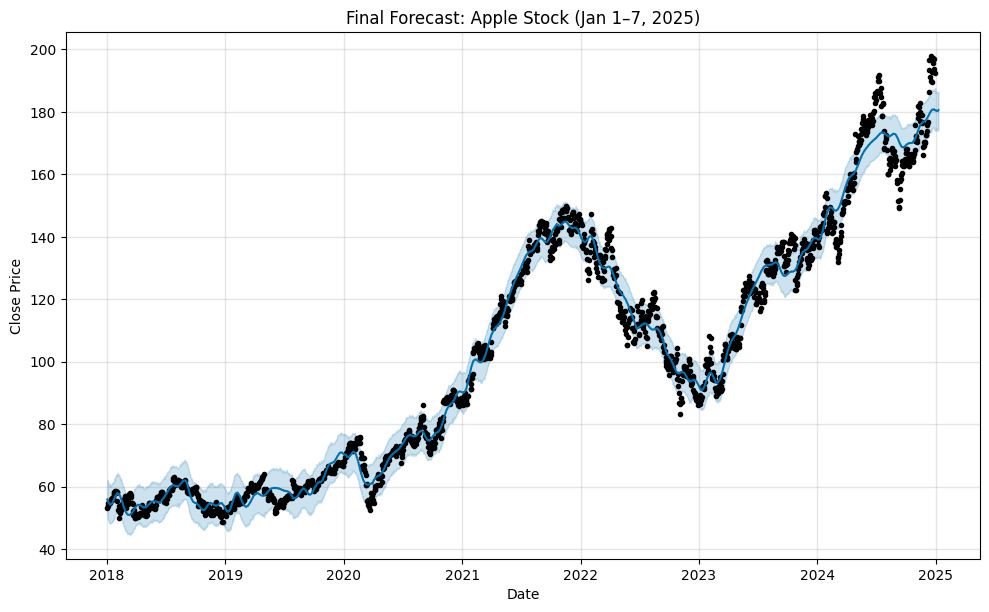

In [ ]:
final_model.plot(forecast)
plt.title("Final Forecast: Apple Stock (Jan 1–7, 2025)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


In [ ]:

# 🔮 Predict for same dates as original data
future_in_sample = df[['ds']]  # just the dates
forecast_in_sample = final_model.predict(future_in_sample)

# 🧠 Merge actual vs predicted
df_eval = df.merge(forecast_in_sample[['ds', 'yhat']], on='ds')
df_eval['error'] = df_eval['y'] - df_eval['yhat']
df_eval['abs_error'] = df_eval['error'].abs()
df_eval['pct_error'] = (df_eval['abs_error'] / df_eval['y']) * 100

# 📊 Summary Metrics
mae = df_eval['abs_error'].mean()
mape = df_eval['pct_error'].mean()
rmse = ((df_eval['error'])**2).mean()**0.5

print("\n📋 In-Sample Model Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


📋 In-Sample Model Evaluation:
MAE:  $3.59
MAPE: 3.58%
RMSE: $4.81


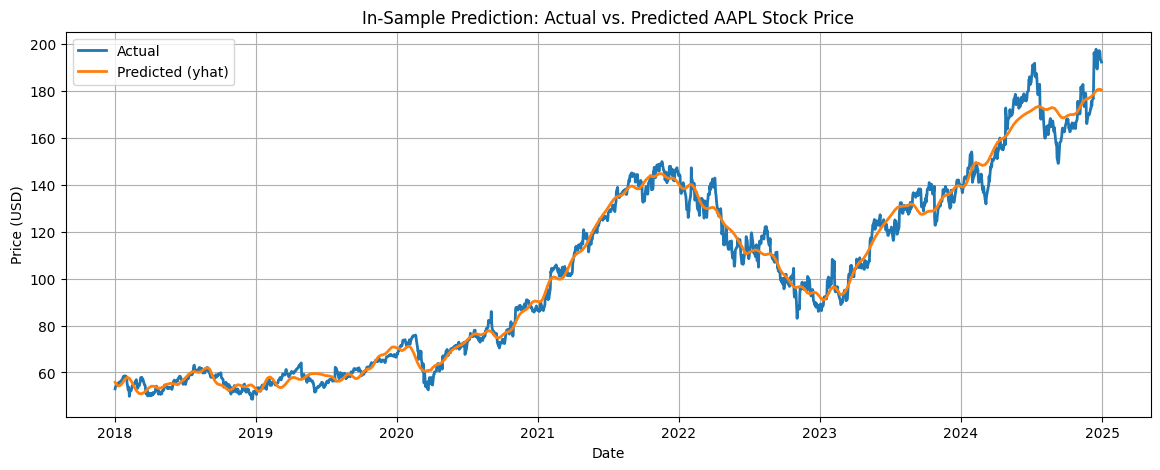

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df_eval['ds'], df_eval['y'], label='Actual', linewidth=2)
plt.plot(df_eval['ds'], df_eval['yhat'], label='Predicted (yhat)', linewidth=2)
plt.title("In-Sample Prediction: Actual vs. Predicted AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
